In [2]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### get the data from data set

In [5]:
df = pd.read_csv("./Mall_Customers.csv")
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [6]:
df.drop(["Age", "Gender", "CustomerID"], axis = 1, inplace = True)
print(df.columns)
df.rename({"Annual Income (k$)": "income", "Spending Score (1-100)": "score"}, 
          axis=1, inplace=True)

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [7]:
from scipy.cluster import hierarchy

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [85.0, 85.0, 103.75, 103.75],
  [75.0, 75.0, 94.375, 94.375],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [84.6875, 84.6875, 143.75, 143.75],
  [43.75, 43.75, 114.21875, 114.21875],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [190.0, 190.0, 237.5, 237.5],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [280.0, 280.0, 300.0, 300.0],
  [213.75, 213.75, 290.0, 290.0],
  [78.984375, 78.984375, 251.875, 251.875],
  [315.0, 315.0, 325.0, 325.0],
  [375.0, 375.0, 385.0, 38

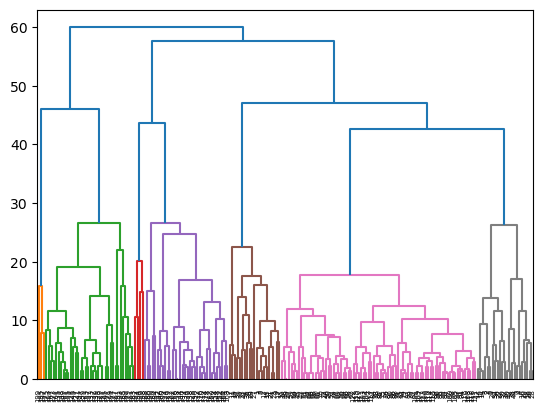

In [11]:
h_model = hierarchy.linkage(df,'average')
hierarchy.dendrogram(h_model)

### build the cluster using aglomartative cluster

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
model = AgglomerativeClustering(n_clusters = 5)
model.fit(df)

AgglomerativeClustering(n_clusters=5)

In [16]:
model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### result visualiazation

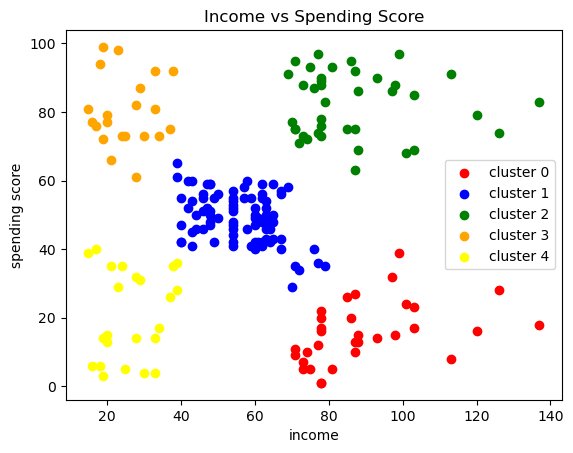

In [17]:
colors = ["red", "blue", "green", "orange", "yellow"]

for cluster_index in range(5):
    # plot the data points
    plt.scatter(df['income'][model.labels_ == cluster_index], 
                df['score'][model.labels_ == cluster_index],
                color=colors[cluster_index], label=f"cluster {cluster_index}")
                
plt.xlabel('income')
plt.ylabel('spending score')
plt.title('Income vs Spending Score')
plt.legend()
